<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/kaggle/Classification_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries for Data loading and Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Load Data

In [2]:
# Load each data file into a data frame
df = pd.read_csv("data.csv")

# View first 5 rows in the Dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 2. Explore Data

In [3]:
# Drop columns
drop_columns = ['id','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst',
'fractal_dimension_worst']
df.drop(drop_columns, axis=1, inplace = True)


# Reset index of dataframe
df = df.reset_index(drop = True)

In [4]:
print('----------Dataset Shape---------------')
print('No of Rows: ', df.shape[0],'| No of Columns: ',df.shape[1])
print('--------------------------------------')
print(' ')
print('-----Column-wise Data types-----------')
print(df.dtypes)
print('--------------------------------------')
print(' ')
print('-----Column-wise Null values----------')
print(df.isnull().sum())
print('--------------------------------------')

----------Dataset Shape---------------
No of Rows:  569 | No of Columns:  11
--------------------------------------
 
-----Column-wise Data types-----------
diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object
--------------------------------------
 
-----Column-wise Null values----------
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64
--------------------------------------


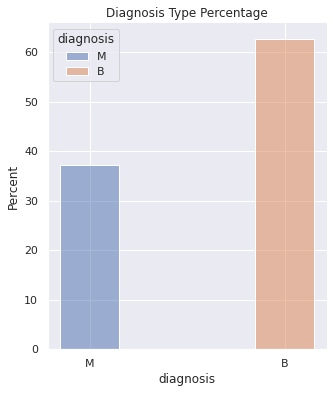

In [5]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,6))
g = sns.histplot(x = 'diagnosis',data = df, hue ='diagnosis', shrink = 0.3, stat = 'percent')
g.set_title("Diagnosis Type Percentage")
sns.despine()

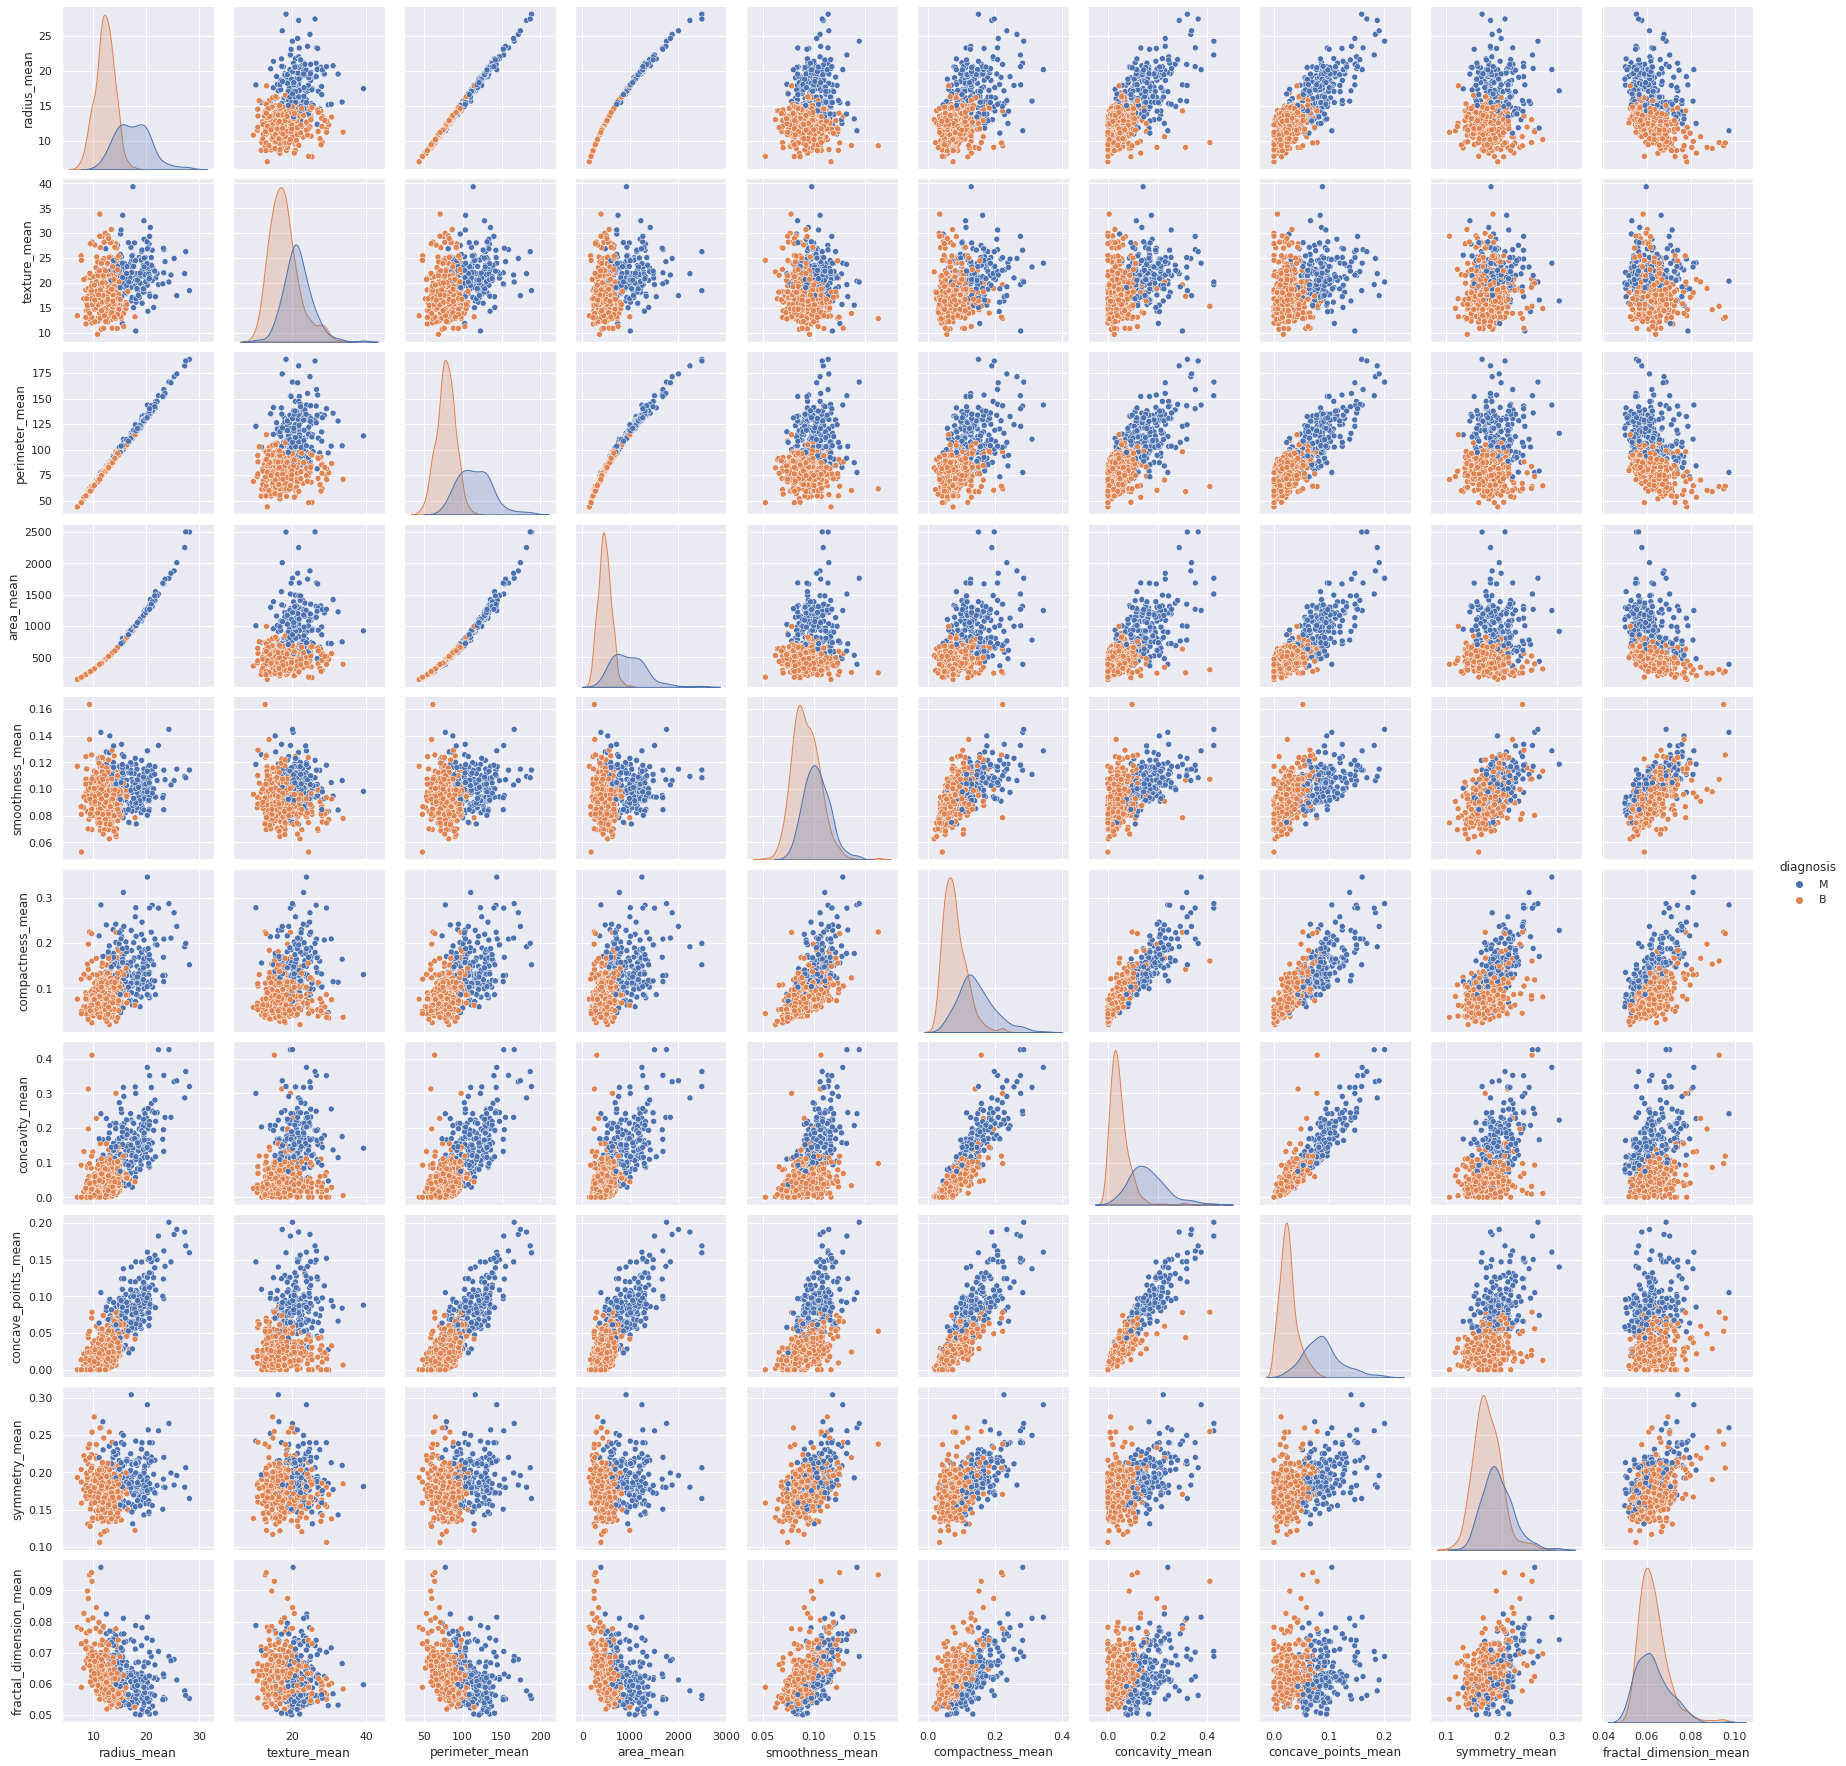

In [6]:
g = sns.pairplot(df, hue = 'diagnosis')

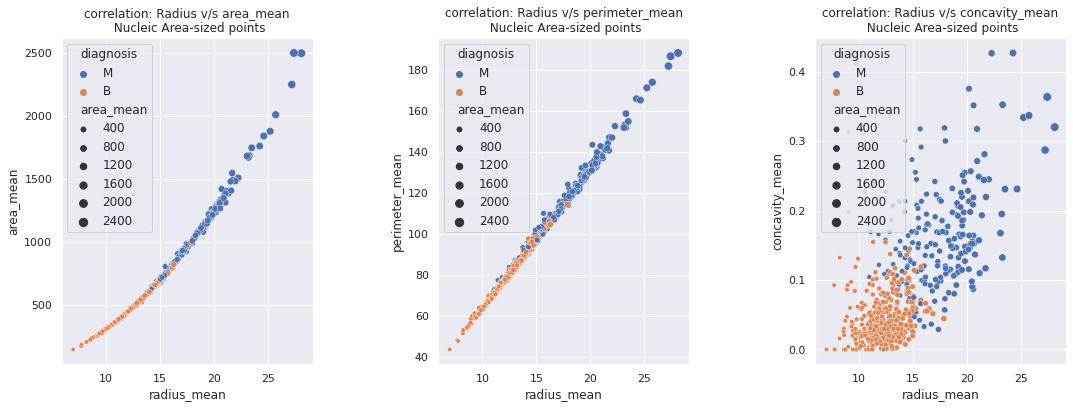

In [7]:
cols = ['area_mean','perimeter_mean', 'concavity_mean']
fig, ax = plt.subplots(ncols=len(cols), figsize=(6 * len(cols),6), sharex = True)
for i in range(len(cols)):
  g = sns.scatterplot(data=df, x="radius_mean", y=df[cols[i]], hue="diagnosis", size = "area_mean", ax  = ax[i]).set_title("correlation: Radius v/s "+cols[i]+"\n Nucleic Area-sized points")

fig.subplots_adjust(wspace=0.5)

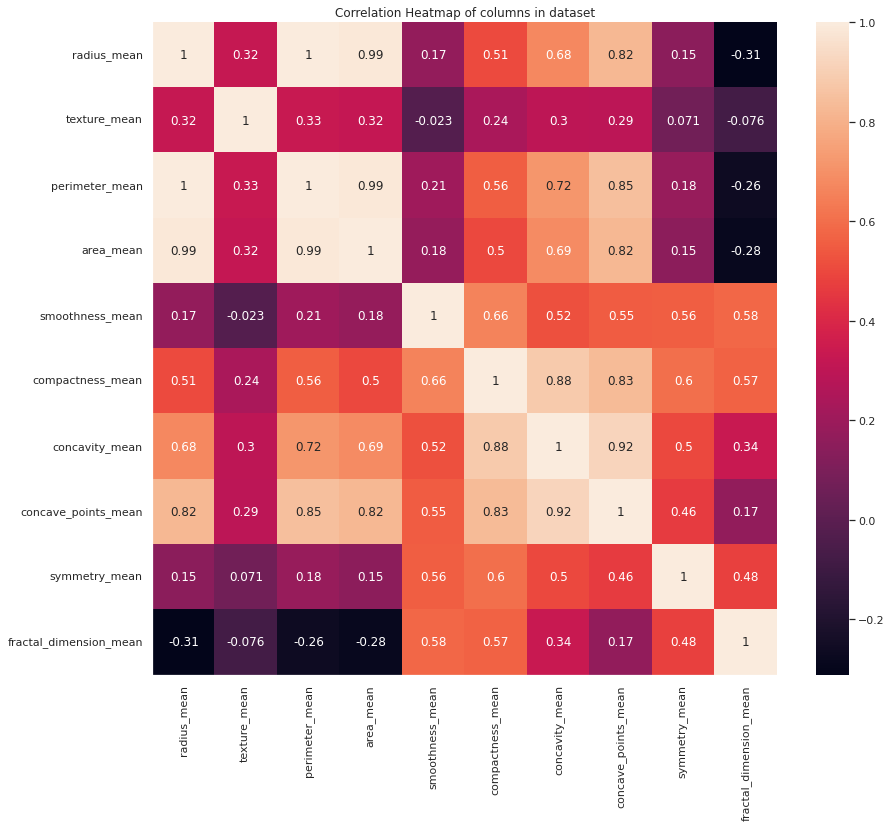

In [8]:
#  Plot Seaborn Heatmap to identify correlated features
fig = plt.figure(figsize=(14,12))         
g = sns.heatmap(df.corr(), annot = True)
g.set_title("Correlation Heatmap of columns in dataset")
sns.despine()

In [9]:
# Function to select highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # absolute coeff value to account for -ve correlation
                colname = corr_matrix.columns[i]  # get name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(df, 0.75)
print("The following",len(set(corr_features)), "columns have high collinearity-","\nColumn names:", corr_features)

The following 4 columns have high collinearity- 
Column names: {'concavity_mean', 'concave_points_mean', 'perimeter_mean', 'area_mean'}


In [10]:
# Drop correlated features returned by the function from dataset
df = df.drop(corr_features,axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883


In [11]:
encoder = LabelEncoder()
df['diagnosis'] = df[['diagnosis']].apply(encoder.fit_transform)

df.head()


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883


In [12]:
# Create X and y variables
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis'].to_frame()

In [13]:
scaler = StandardScaler(copy = True, with_mean = True, with_std = True)
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

X_scaled.mean()

radius_mean              -1.256562e-16
texture_mean              1.049736e-16
smoothness_mean          -8.226187e-16
compactness_mean          2.419467e-16
symmetry_mean             1.957036e-16
fractal_dimension_mean    5.073075e-16
dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
# Split Data into Train and Test sets with 80% of data as Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.8, random_state=0)

In [15]:
# Import libraries for Model training, prediction and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

In [21]:
# clf_dct = DecisionTreeClassifier()

clf_dct = DecisionTreeClassifier(max_depth = 5, criterion = 'gini', max_features = 'sqrt', min_samples_split = 2)

# Fit Model to the training set
clf_dct.fit(X_train,np.ravel(y_train))

# Predict testing set using the Trained Model
y_pred = clf_dct.predict(X_test)

# Find the cross validation scores for each of the runs for K = 5 and take the mean for Accuracy
scores = cross_val_score(clf_dct, X_scaled, np.ravel(y), scoring='accuracy', cv=5)
print("Accuracy: %0.2f" % (scores.mean()))


Accuracy: 0.89


In [18]:
params = { 'max_depth' : [3,5,10,15,20,25,30,35,40,45,50],
          'criterion' : ["gini","entropy"],
          'max_features' : ['auto', 'sqrt', 'log2'],
          'min_samples_split' : [2,4,6,8,10]
         }
grid = GridSearchCV(clf_dct, params, n_jobs=-1)
grid.fit(X, np.ravel(y))
grid.best_params_


{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 2}

In [ ]:

# Find the cross validation scores for each of the runs for K = 10 and take the mean for Accuracy
scores = cross_val_score(clf_dct, X, np.ravel(y), scoring='accuracy', cv=5)
print("Accuracy: %0.2f" % (scores.mean()))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate Stander Scaler and fit and tranform feature variable set X
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

# Split Data into Train and Test sets with 80% of data as Test set
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.8, random_state=0)


,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
0,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,1.148757,2.750622
1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.805450,-0.243890
2,1.579888,0.456187,0.942210,1.052926,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.237036,1.152255
3,-0.768909,0.253732,3.283553,3.402909,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,4.732680,6.046041
4,1.750297,-1.151816,0.280372,0.539340,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,-0.361092,-0.868353


In [ ]:
# clf_svc = SVC(probability=True)

clf_svc = SVC(kernel='linear', C = 1000, degree = 1)

# Fit Model to the training set
clf_svc.fit(X_train,np.ravel(y_train))

# Predict testing set using the Trained Model
y_pred = clf_svc.predict(X_test)

# Find the cross validation scores for each of the runs for K = 10 and take the mean for Accuracy
scores = cross_val_score(clf_svc, X, np.ravel(y), scoring='accuracy', cv=5)
print("Accuracy: %0.2f" % (scores.mean()))

Accuracy: 0.96


In [ ]:
params = { 'kernel' : ['linear','rbf','poly','sigmoid'],
          'C' : [0.1,1,100,1000],
          'degree' : [1,2,3,4,5,6]
         }
grid = GridSearchCV(clf_svc, params, njobs=-1)
grid.fit(X, np.ravel(y))
grid.best_params_

{'C': 1000, 'degree': 1, 'kernel': 'linear'}

In [ ]:
# Initialize Logistic Regression with max_iteration 1000
# clf_log = LogisticRegression(max_iter=1000)

clf_log = LogisticRegression(C= 29.763514416313132, max_iter = 1000, penalty= 'l1', solver= 'liblinear')

# Fit Model to the training set
clf_log.fit(X_train_scaled,np.ravel(y_train))

# Predict testing set using the Trained Model
y_pred = clf_log.predict(X_test_scaled)

scores = cross_val_score(clf_log, X, np.ravel(y), scoring='accuracy', cv=5)
print("Accuracy: %0.2f" % (scores.mean()))

Accuracy: 0.96


In [ ]:
params = { 'penalty' : ['l1','l2','elasticnet'],
          'C' : np.logspace(-4, 4, 20),
          'solver' : ['lbfgs', 'liblinear'],
          'max_iter' : [1000,2000,3000,4000] 
         }
grid = GridSearchCV(clf_log, params, njobs=-1)
grid.fit(X, np.ravel(y))
grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 29.763514416313132,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
import xgboost as xgb

In [ ]:
clf_xgb = xgb.XGBClassifier()

# clf_xgb = xgb.XGBClassifier(
    
# colsample_bytree = 0.6,
# gamma = 0.4,
# learning_rate = 0.2,
# max_depth = 3,
# min_child_weight = 1

# )

# Fit Model to the training set
clf_xgb.fit(X_train_scaled,np.ravel(y_train))

# Predict testing set using the Trained Model
y_pred = clf_xgb.predict(X_test_scaled)

scores = cross_val_score(clf_xgb, X, np.ravel(y), scoring='accuracy', cv=5)
print("Accuracy: %0.2f" % (scores.mean()))

Accuracy: 0.96


In [ ]:
params = { 'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3],
          'max_depth' : [3,4,5,6,8,10,12,16],
          'min_child_weight' : [1,3,5,7],
          'gamma' : [0,0.1,0.2,0.3,0.4],
          'colsample_bytree' : [0.3,0.4,0.5,0.6]
         }
grid = GridSearchCV(clf_xgb, params, njobs=-1)
grid.fit(X, np.ravel(y))
grid.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.4,
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 1}